In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

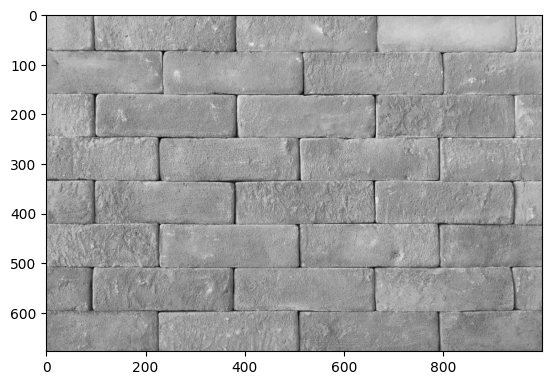

In [3]:
brick_image = cv2.imread('images/brick_wall.jpg')
gray_brick = cv2.cvtColor(brick_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_brick, cmap='gray')


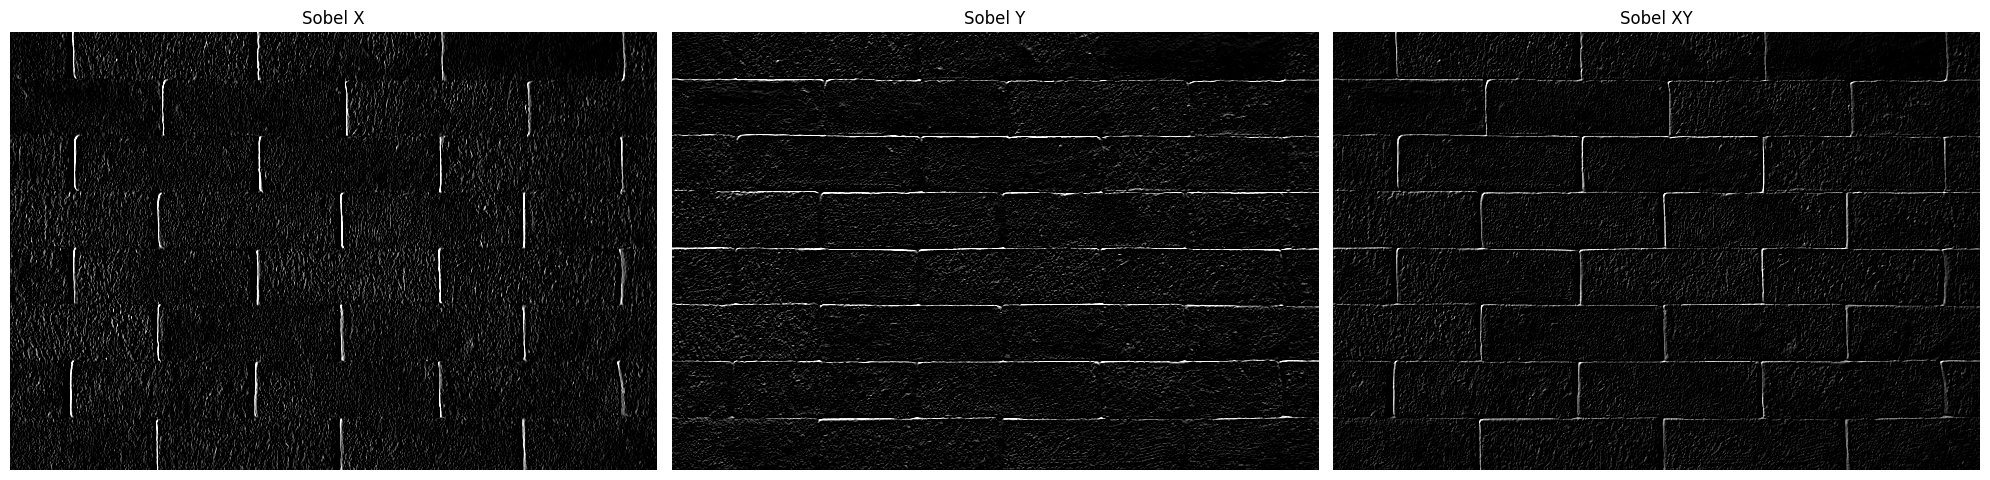

In [4]:
gray_brick_sobelx = cv2.Sobel(gray_brick, cv2.CV_64F, dx=1, dy=0, ksize=3) #ksize = kernel size
gray_brick_sobely = cv2.Sobel(gray_brick, cv2.CV_64F, dx=0, dy=1, ksize=3)
gray_brick_sobelxy = cv2.addWeighted(gray_brick_sobelx, 0.5, gray_brick_sobely, 0.5, 0) 

images = [gray_brick_sobelx, gray_brick_sobely, gray_brick_sobelxy]
titles = ['Sobel X', 'Sobel Y', 'Sobel XY']

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()



In [5]:
print(gray_brick_sobelxy)
img_sobelx = cv2.convertScaleAbs(gray_brick_sobelxy)
print("==========================")
print(img_sobelx)

[[  0.   2.   0. ...  10.  12.   0.]
 [-14.   1.   8. ...  34.  51.  39.]
 [ 13.  18.   3. ...  26.  27.   0.]
 ...
 [-14. -26.   3. ...   3.  -3.   4.]
 [ 16. -21.  11. ...  -1.  -1.   4.]
 [  0. -37.  20. ... -17.  -6.   0.]]
[[ 0  2  0 ... 10 12  0]
 [14  1  8 ... 34 51 39]
 [13 18  3 ... 26 27  0]
 ...
 [14 26  3 ...  3  3  4]
 [16 21 11 ...  1  1  4]
 [ 0 37 20 ... 17  6  0]]


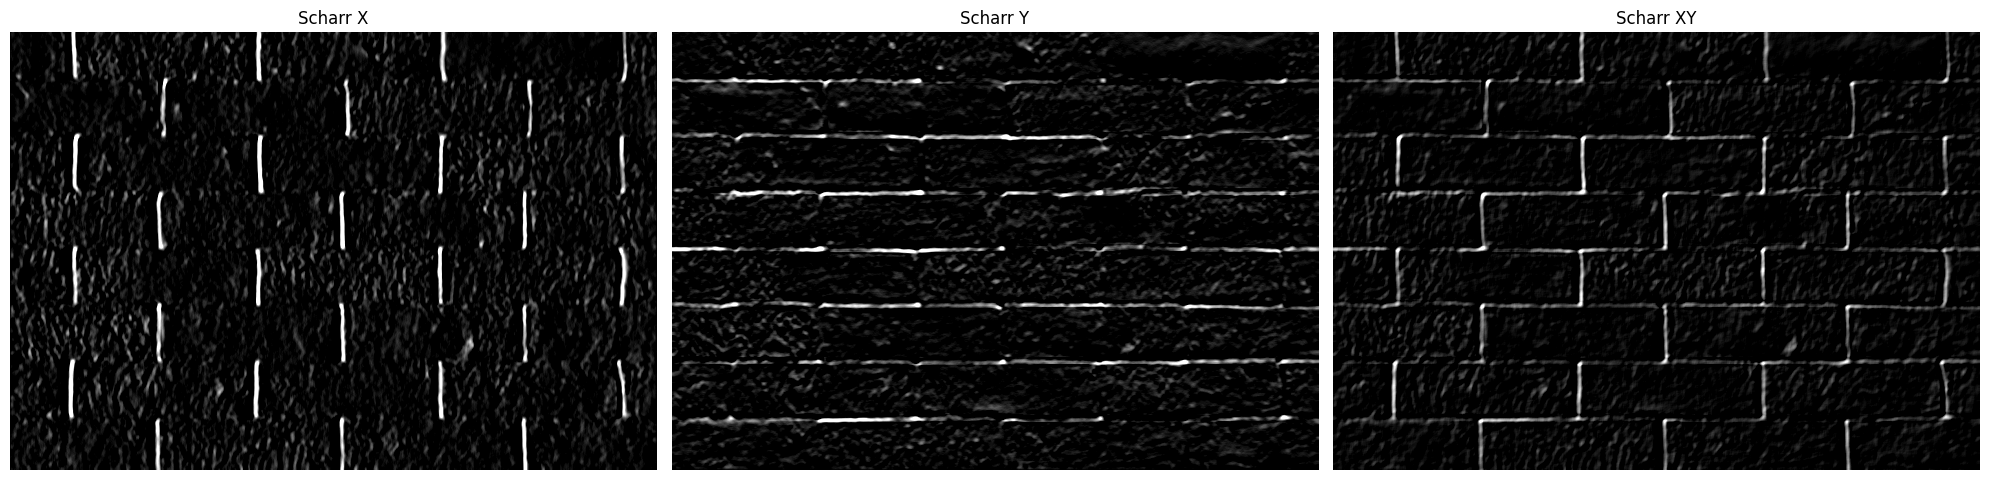

In [6]:
#Scharr generates too much noise
gray_brick_blurred = cv2.GaussianBlur(gray_brick, (9, 9), 3, 3)

gray_brick_scharrx = cv2.Scharr(gray_brick_blurred, cv2.CV_64F, dx=1, dy=0)
gray_brick_scharry = cv2.Scharr(gray_brick_blurred, cv2.CV_64F, dx=0, dy=1)
gray_brick_scharrxy = cv2.addWeighted(gray_brick_scharrx, 0.5, gray_brick_scharry, 0.5, 0)

images = [gray_brick_scharrx, gray_brick_scharry, gray_brick_scharrxy]
titles = ['Scharr X', 'Scharr Y', 'Scharr XY']

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

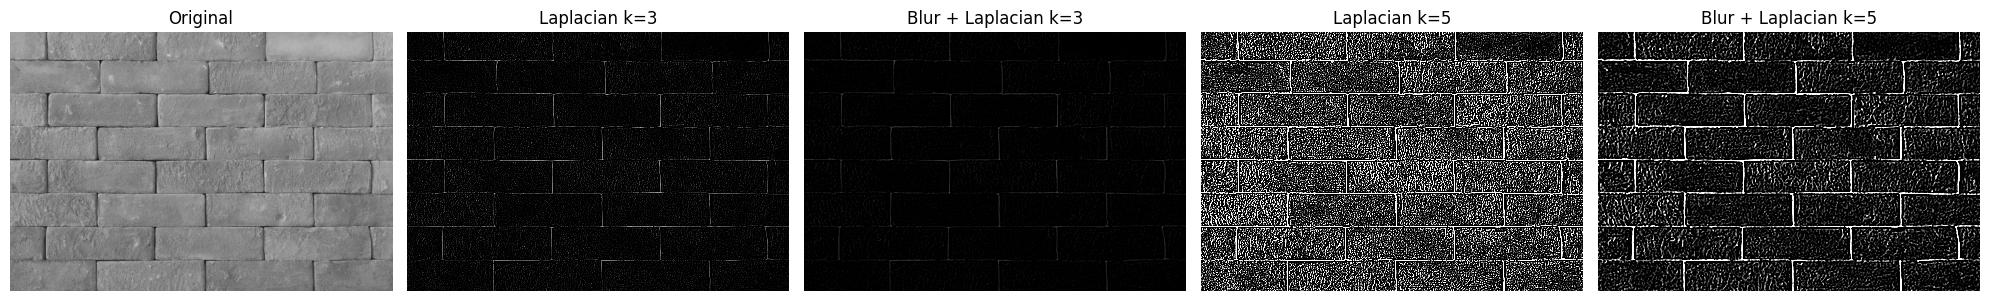

In [7]:
img_laplacian3 = cv2.Laplacian(gray_brick, cv2.CV_64F, ksize=3)

img_blur = cv2.GaussianBlur(gray_brick, (5, 5), 5, 5)
img_blur_laplacian3 = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=3)

img_laplacian5 = cv2.Laplacian(gray_brick, cv2.CV_64F, ksize=5)

img_blur = cv2.GaussianBlur(gray_brick, (5, 5), 5, 5)
img_blur_laplacian5 = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=5)

blank = np.zeros_like(gray_brick)

imgsArray = [gray_brick, img_laplacian3, img_blur_laplacian3, img_laplacian5, img_blur_laplacian5]
titlesArray = ['Original', 'Laplacian k=3', 'Blur + Laplacian k=3', 'Laplacian k=5', 'Blur + Laplacian k=5']

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(imgsArray[i], cmap='gray', vmin=0, vmax=255)
    ax.set_title(titlesArray[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

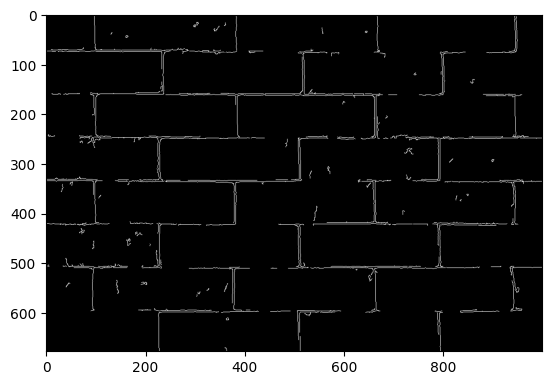

In [8]:

img = cv2.cvtColor(brick_image, cv2.COLOR_RGB2GRAY)
img = cv2.GaussianBlur(img, (3, 3), 3, 3)
copyimg = img.copy()

canny_img = cv2.Canny(copyimg, 100, 200)

plt.imshow(canny_img, cmap='gray')